
# TP autoencoder

Diane LINGRAND

diane.lingrand@univ-cotedazur.fr 

In [1]:
import tensorflow
print(tensorflow.__version__)
import tensorflow.keras

2.4.1


In [31]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import glob
#!pip install tqdm
from tqdm import tqdm
import random
from matplotlib import pyplot as plt

# Part I: playing with the MNIST dataset

In [127]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# preprocessings
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
xTrain = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
xTest = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

size1 = len(xTrain[0])
size = len(x_train[0])
print(size,size1)

28 784


## a first simple autoencoder

In [14]:
inputImage = Input(shape=(size1,))
encoded = Dense(size, activation='relu')(inputImage)
decoded = Dense(size1, activation='sigmoid')(encoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               22736     
Total params: 44,716
Trainable params: 44,716
Non-trainable params: 0
_________________________________________________________________


In [15]:
### learning the autoencoder
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0947 - val_loss: 0.0373
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0342 - val_loss: 0.0261
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0248 - val_loss: 0.0206
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0198 - val_loss: 0.0175
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0171 - val_loss: 0.0157
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 8/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 9/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 10/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0126 - val_lo

In [21]:
# scores
print("train score = ", autoencoder.evaluate(xTrain,xTrain))
print("test score = ", autoencoder.evaluate(xTest,xTest))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0118
train score =  0.011779389344155788
313/313 [==============================] - 1s 2ms/step - loss: 0.0115
test score =  0.01148584857583046


In [22]:
xTrainPredicted = autoencoder.predict(xTrain)

image number:  58187
(784,)
(28, 28)


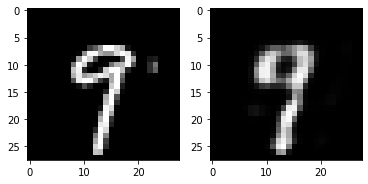

In [23]:
# let's look at the images
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

image number:  19268


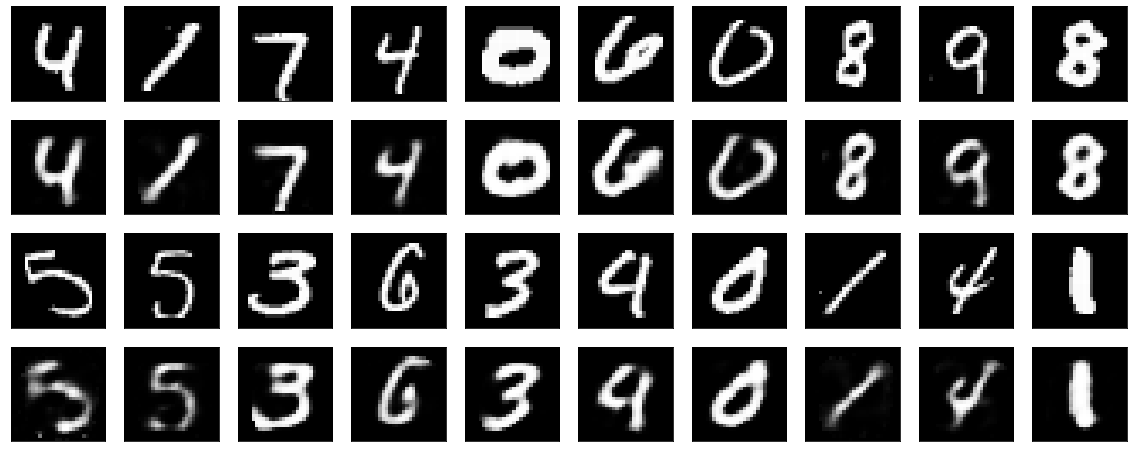

In [24]:
#more images (could also be done on the test dataset)
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)

fig = plt.figure(figsize=(20, 8))
for i in range(1,11):
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
    
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i+20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+30)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
plt.show()

## a more complex autoencoder

In [4]:
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 28)                7028      
_________________________________________________________________
dense_3 (Dense)              (None, 250)               7250      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               125500    
_________________________________________________________________
dense_5 (Dense)              (None, 784)               392784

In [5]:
### learning the autoencoder
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.0663 - val_loss: 0.0197
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0179 - val_loss: 0.0149
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0141 - val_loss: 0.0131
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 8/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 9/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 10/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0091 - val_lo

In [6]:
# scores
print("train score = ", autoencoder.evaluate(xTrain,xTrain))
print("test score = ", autoencoder.evaluate(xTest,xTest))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0063
train score =  0.006284228526055813
313/313 [==============================] - 1s 2ms/step - loss: 0.0073
test score =  0.007336064707487822


In [7]:
xTrainPredicted = autoencoder.predict(xTrain)

image number:  2664
(784,)
(28, 28)


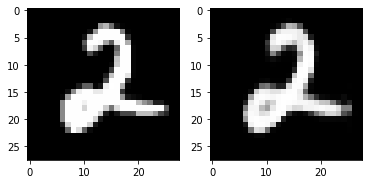

In [8]:
# let's look at the images
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

image number:  24796


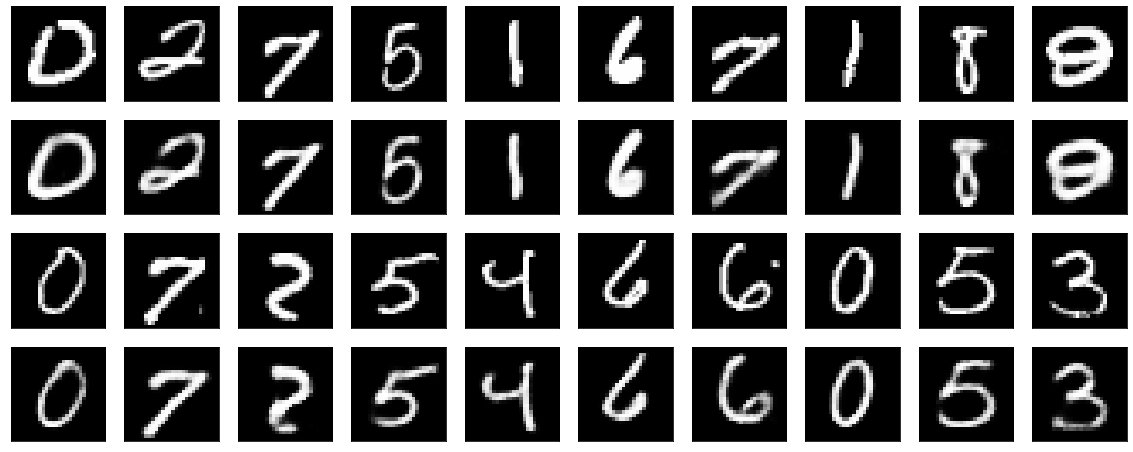

In [9]:
#more images (could also be done on the test dataset)
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)

fig = plt.figure(figsize=(20, 8))
for i in range(1,11):
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
    
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i+20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+30)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
plt.show()

## a convolutional autoencoder

In [13]:
xTrain = x_train
xTest = x_test

In [18]:
inputImage = Input(shape=(size, size, 1))
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = UpSampling2D((2,2))(encoded)

decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu',padding='same')(decoded)
decoded = Conv2D(1, (3,3), activation="relu", padding="same")(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        2320

What is the dimension of the bottleneck ? Learn, test, and observe the differences.

Don't forget to put (28x28 images in input)

In [19]:
### learning the autoencoder
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(xTrain, xTrain, epochs=10, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

Epoch 1/100
375/375 [==============================] - 13s 26ms/step - loss: 0.0207 - val_loss: 0.0048
Epoch 2/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 3/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 4/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 5/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 9/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/100
375/375 [==============================] - 9s 25ms/step - loss: 0.00

In [20]:
# scores
print("train score = ", autoencoder.evaluate(xTrain,xTrain))
print("test score = ", autoencoder.evaluate(xTest,xTest))

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0015
train score =  0.0015009326161816716
313/313 [==============================] - 1s 4ms/step - loss: 0.0015
test score =  0.001482742140069604


In [21]:
xTrainPredicted = autoencoder.predict(xTrain)

image number:  16808
(28, 28, 1)
(28, 28)


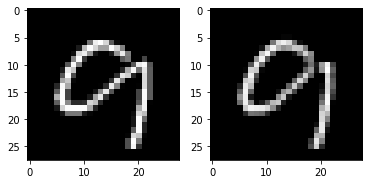

In [22]:
# let's look at the images
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

image number:  12489


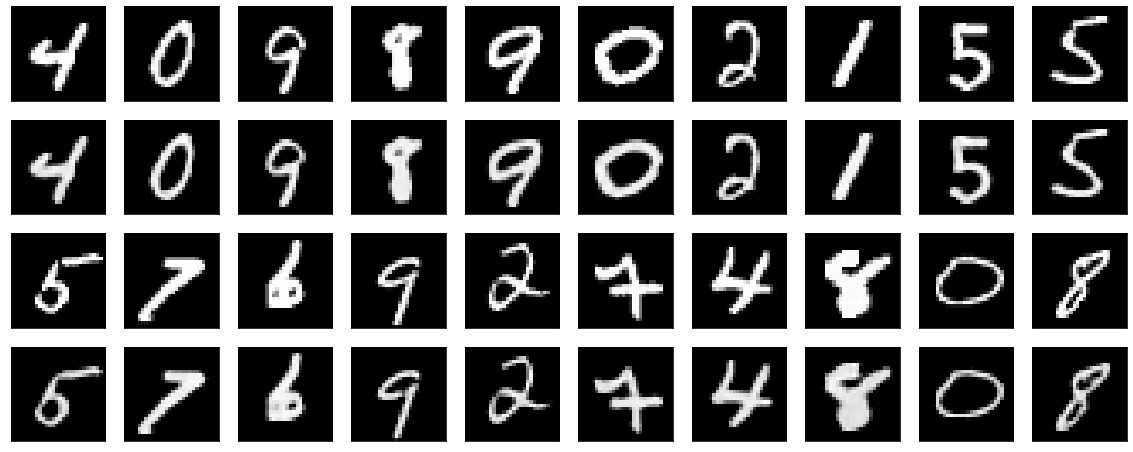

In [23]:
#more images (could also be done on the test dataset)
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)

fig = plt.figure(figsize=(20, 8))
for i in range(1,11):
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
    
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i+20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+30)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
plt.show()

## separate encoding and decoding

In [128]:
# encoder part
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# decoder part
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

# autoencoder model that will be learned
autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
autoencoder.summary()

#encoder model: weigths are already learned
encoderModel = Model(inputImage, encoded)
encoderModel.summary()
# decoder model (adapt this code to your network): weigths are already learned
inputLatent = Input(shape=(28,)) 
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)
decoderModel.summary()

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0635 - val_loss: 0.0176
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0157 - val_loss: 0.0126
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 8/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 9/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 10/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0071 - val_lo

In [201]:
random_val = np.random.randint(0,27)

In [202]:
#For a single data:
index = random.randint(0,len(xTest)-2)
print("image number: ", index)
im = xTest[index]

# encoding of an image
latentData = encoderModel.predict(np.array([im,]))
latentData[0, random_val] = 20
# latentData = (latentData/max(latentData[0]))

print("shape = ",latentData.shape)

decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)

image number:  3931
shape =  (1, 28)
shape2 =  (1, 784)


In [203]:
print(random_val, min(latentData[0]), max(latentData[0]), latentData, sep="\n")

1
0.0
20.0
[[ 8.75444   20.         4.293146  17.067198   7.0721545  3.0644987
   9.883719   4.536613   4.6945295  4.9709163 10.346579   0.
   4.865859  10.633145   8.050108   3.7761388  5.8679953 11.839991
   5.6046643  8.331713   3.4401774  7.3441887  0.8721058  4.9558277
   7.5495267  0.         6.227643   9.930176 ]]


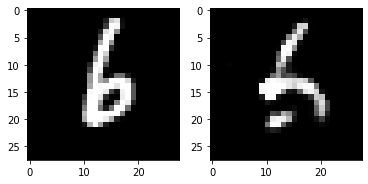

In [204]:
#display
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(im.reshape(28,28), cmap='gray')
ax = fig.add_subplot(1,2,2)

plt.imshow(decodedData[0].reshape(28,28), cmap='gray')
plt.show()

# Part II: playing with the animals10 dataset

In [36]:
# download the dataset
# from google.colab import drive
# drive.mount('/content/drive/')
# datasetRoot='/content/drive/My Drive/DLS2020/raw-img/'

In [43]:
# or work localy using already downloaded dataset
# modify to your local directory
datasetRoot='/home/qlr/Downloads/raw-img/'

In [46]:

classes = ['mucca', 'elefante', 'gatto', 'cavallo', 'scoiattolo', 'ragno', 'pecora', 'farfalla', 'gallina', 'cane']
#training data

rootTrain = datasetRoot #+'train/'
size = 66 #112 #224 #try different image size reductions
size2 = size*size
nbImages = 0
for cl in classes:
    nbImages += len(glob.glob(rootTrain+cl+'/*'))
xTrain = xTrain = np.empty(shape=(nbImages,size2))
print("total number of images: ",len(xTrain))
i = 0
for cl in tqdm(classes):
    listImages = glob.glob(rootTrain+cl+'/*')
    print("class: ", cl, " : ", len(listImages)) 
    for pathImg in tqdm(listImages): 
        img = image.load_img(pathImg, target_size=(size, size),color_mode='grayscale')
        im = image.img_to_array(img)
        im = np.reshape(im,size2)
        im /= 255.0
        xTrain[i, :] = im 
        i += 1
print(xTrain.shape)



  4%|▍         | 70/1866 [00:00<00:02, 698.21it/s]

total number of images:  26179
class:  mucca  :  1866



  3%|▎         | 37/1446 [00:00<00:03, 368.46it/s]

class:  elefante  :  1446



  0%|          | 0/1668 [00:00<?, ?it/s]

class:  gatto  :  1668



  3%|▎         | 69/2623 [00:00<00:03, 685.63it/s]

class:  cavallo  :  2623



  3%|▎         | 65/1862 [00:00<00:02, 645.28it/s]

class:  scoiattolo  :  1862



  1%|          | 58/4821 [00:00<00:08, 575.35it/s]

class:  ragno  :  4821



  2%|▏         | 45/1820 [00:00<00:03, 445.69it/s]

class:  pecora  :  1820



  2%|▏         | 47/2112 [00:00<00:04, 462.61it/s]

class:  farfalla  :  2112



  2%|▏         | 62/3098 [00:00<00:04, 613.08it/s]

class:  gallina  :  3098



  1%|          | 59/4863 [00:00<00:08, 580.77it/s]

class:  cane  :  4863



100%|██████████| 10/10 [00:56<00:00,  5.62s/it]

(26179, 4356)


In [47]:
print(size2)

4356


## Let us build an autoencoder

In [48]:
inputImage = Input(shape=(size2,))
encoded = Dense(4000, activation='relu')(inputImage)
encoded = Dense(2000, activation='relu')(encoded)

decoded = Dense(4000, activation='relu')(encoded)
decoded = Dense(size2, activation='sigmoid')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
print(autoencoder.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 4356)]            0         
_________________________________________________________________
dense_30 (Dense)             (None, 4000)              17428000  
_________________________________________________________________
dense_31 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_32 (Dense)             (None, 4000)              8004000   
_________________________________________________________________
dense_33 (Dense)             (None, 4356)              17428356  
Total params: 50,862,356
Trainable params: 50,862,356
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [50]:
#learning
autoencoder.fit(xTrain, xTrain, epochs=100,batch_size=32, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

Epoch 1/100
82/82 [==============================] - 9s 104ms/step - loss: 0.0607 - val_loss: 0.0522
Epoch 2/100
82/82 [==============================] - 8s 100ms/step - loss: 0.0439 - val_loss: 0.0372
Epoch 3/100
82/82 [==============================] - 8s 100ms/step - loss: 0.0344 - val_loss: 0.0332
Epoch 4/100
82/82 [==============================] - 8s 100ms/step - loss: 0.0303 - val_loss: 0.0291
Epoch 5/100
82/82 [==============================] - 8s 100ms/step - loss: 0.0279 - val_loss: 0.0277
Epoch 6/100
82/82 [==============================] - 8s 101ms/step - loss: 0.0266 - val_loss: 0.0264
Epoch 7/100
82/82 [==============================] - 8s 100ms/step - loss: 0.0254 - val_loss: 0.0252
Epoch 8/100
82/82 [==============================] - 8s 102ms/step - loss: 0.0251 - val_loss: 0.0244
Epoch 9/100
82/82 [==============================] - 8s 100ms/step - loss: 0.0240 - val_loss: 0.0236
Epoch 10/100
82/82 [==============================] - 8s 101ms/step - loss: 0.0233 - val_lo

In [51]:
print("score = ", autoencoder.evaluate(xTrain,xTrain))

819/819 [==============================] - 6s 7ms/step - loss: 0.0164
score =  0.016432704403996468


In [52]:
# predictions
xTrainPredicted = autoencoder.predict(xTrain)

image number:  19830
(4356,)
(66, 66)


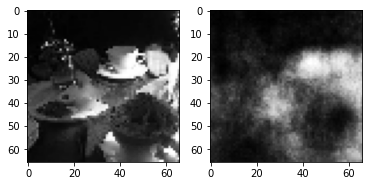

In [60]:
# let's look at the differences

index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

Try also to plot more images.

## From dense to convolutional layers
Change the Dense layers to Conv2D layers and add Pooling layers. 

In [61]:
# prepare the data
xTrain = xTrain.reshape(nbImages,size,size)

In [62]:
print(xTrain.shape)

(26179, 66, 66)


In [63]:
# your work is to try different architectures in order to find the best reconstruction / reduction of latent representation
#  encoder part
size=66
inputImage = tensorflow.keras.Input(shape=(size, size, 1))
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
#  decoding part
decoded = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
print(autoencoder.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 66, 66, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 66, 66, 2)         20        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 33, 33, 2)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 2)         38        
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 66, 66, 2)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 66, 66, 1)         19        
Total params: 77
Trainable params: 77
Non-trainable params: 0
______________________________________________________________

In [64]:
# compile, run, test, ... as in previous section
autoencoder.fit(xTrain, xTrain, epochs=100,batch_size=256, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

Epoch 1/100
82/82 [==============================] - 5s 56ms/step - loss: 0.0663 - val_loss: 0.0635
Epoch 2/100
82/82 [==============================] - 4s 46ms/step - loss: 0.0533 - val_loss: 0.0397
Epoch 3/100
82/82 [==============================] - 4s 47ms/step - loss: 0.0348 - val_loss: 0.0309
Epoch 4/100
82/82 [==============================] - 4s 47ms/step - loss: 0.0281 - val_loss: 0.0267
Epoch 5/100
82/82 [==============================] - 4s 46ms/step - loss: 0.0251 - val_loss: 0.0239
Epoch 6/100
82/82 [==============================] - 4s 46ms/step - loss: 0.0226 - val_loss: 0.0217
Epoch 7/100
82/82 [==============================] - 4s 46ms/step - loss: 0.0206 - val_loss: 0.0200
Epoch 8/100
82/82 [==============================] - 4s 46ms/step - loss: 0.0192 - val_loss: 0.0185
Epoch 9/100
82/82 [==============================] - 4s 46ms/step - loss: 0.0178 - val_loss: 0.0172
Epoch 10/100
82/82 [==============================] - 4s 47ms/step - loss: 0.0169 - val_loss: 0.0161

In [65]:
print("score = ", autoencoder.evaluate(xTrain,xTrain))
xTrainPredictedConv = autoencoder.predict(xTrain)

819/819 [==============================] - 4s 4ms/step - loss: 0.0079
score =  0.007890358567237854


image number:  13499
(66, 66, 1)


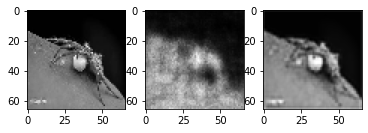

In [66]:
# let's look at the differences

index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im2 = xTrainPredicted[index]
im2 = im2.reshape((size,size))
im3 = xTrainPredictedConv[index]
print(im3.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 3, 2)
plt.imshow(im2, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(im3[:,:,0], cmap='gray')
plt.show()

<hr>

### personal attempt

In [121]:
# your work is to try different architectures in order to find the best reconstruction / reduction of latent representation
#  encoder part
size=66

inputImage = Input(shape=(size, size, 1))
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)

decoded = UpSampling2D((2,2))(encoded)
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu',padding='same')(decoded)
decoded = Conv2D(1, (3,3), activation="relu")(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 

In [122]:
print(autoencoder.summary())

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 66, 66, 1)]       0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 66, 66, 64)        640       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 33, 33, 32)        18464     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 17, 17, 16)        4624      
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 17, 17, 16)        232

In [102]:
# compile, run, test, ... as in previous section
autoencoder.fit(xTrain, 
                xTrain, 
                epochs=100,
                batch_size=32, 
                validation_split=0.2, 
                shuffle=True,
                callbacks=[ourCallback])

Epoch 1/100
655/655 [==============================] - 32s 46ms/step - loss: 0.0246 - val_loss: 0.0073
Epoch 2/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0089 - val_loss: 0.0061
Epoch 3/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 4/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 5/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 6/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0065 - val_loss: 0.0048
Epoch 7/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0062 - val_loss: 0.0046
Epoch 8/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 9/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 10/100
655/655 [==============================] - 29s 45ms/step - l

In [103]:
print("score = ", autoencoder.evaluate(xTrain,
                                       xTrain))

xTrainPredictedConv = autoencoder.predict(xTrain)

819/819 [==============================] - 12s 15ms/step - loss: 0.0041
score =  0.004130528308451176


image number:  22555
(66, 66, 1)


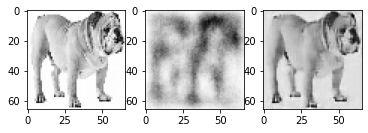

In [114]:
# let's look at the differences

index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im2 = xTrainPredicted[index]
im2 = im2.reshape((size,size))
im3 = xTrainPredictedConv[index]
print(im3.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 3, 2)
plt.imshow(im2, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(im3[:,:,0], cmap='gray')
plt.show()

## Perturbation on the latent representation

In this section, we will perturb the latent representation before decoding. Perturbations will be represented as additive noise. We will also explore the latent space by searching for latent vectors in the neighbourhood of some latent representation of training samples and see how the decoding representation looks like.

In [125]:
# encoder model 
encoderModel = Model(inputImage, encoded)
# decoder model (adapt this code to your network)
inputLatent = Input(shape=(17, 17, 16)) # to adapt to your network
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)

image number:  23755
shape =  (1, 17, 17, 16)
shape2 =  (1, 32, 32, 1)


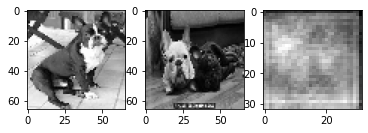

In [126]:
# ATTENTION: à adapter à votre réseau
index = random.randint(0,len(xTrain)-2)
print("image number: ", index)
im1 = xTrain[index]
jm1 = xTrain[index+1]
# encoding of an image
latentData1 = encoderModel.predict(np.array([im1,]))
latentData2 = encoderModel.predict(np.array([jm1,]))
# perturbation on the latent representation (you have to try different values/distributions for epsilon)
epsilon = 0.1
#une possibilité: ajouter du bruit à la représentation latente
#latentData += np.random.uniform(-epsilon, epsilon, size=(1,33,33,16))
print("shape = ",latentData.shape)
# ou bien, prendre la représentation latente de 2 images de meme classe et faire la moyenne (puis la décoder)
# decoding of the latent representation
latentData = 0.5*(latentData1+latentData2)
decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)
#display
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1,3,2)
plt.imshow(jm1, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(decodedData[0,:,:,0], cmap='gray')
plt.show()

image number:  2125
shape =  (1, 34, 34, 16)
shape2 =  (1, 66, 66, 1)


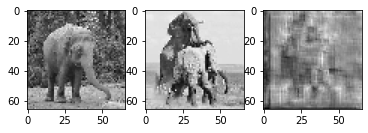

In [120]:
# ATTENTION: à adapter à votre réseau
index = random.randint(0,len(xTrain)-2)
print("image number: ", index)
im1 = xTrain[index]
jm1 = xTrain[index+1]
# encoding of an image
latentData1 = encoderModel.predict(np.array([im1,]))
latentData2 = encoderModel.predict(np.array([jm1,]))
# perturbation on the latent representation (you have to try different values/distributions for epsilon)
epsilon = 0.1
#une possibilité: ajouter du bruit à la représentation latente
#latentData += np.random.uniform(-epsilon, epsilon, size=(1,33,33,16))
print("shape = ",latentData.shape)
# ou bien, prendre la représentation latente de 2 images de meme classe et faire la moyenne (puis la décoder)
# decoding of the latent representation
latentData = 0.5*(latentData1+latentData2)
decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)
#display
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1,3,2)
plt.imshow(jm1, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(decodedData[0,:,:,0], cmap='gray')
plt.show()